___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# NLP (Natural Language Processing) with Python

    
Đây là notebook đi kèm với video bài giảng NLP!

Trong bài giảng này, chúng ta sẽ thảo luận về tổng quan ở cấp độ cao hơn về các khái niệm cơ bản của Xử lý ngôn ngữ tự nhiên, về cơ bản bao gồm việc kết hợp các kỹ thuật máy học với văn bản và sử dụng toán học và thống kê để có được văn bản đó ở định dạng mà các thuật toán máy học có thể hiểu được!

Sau khi hoàn thành bài giảng này, bạn sẽ có một dự án sử dụng một số Dữ liệu Văn bản của Yelp!
    
**Requirements: You will need to have NLTK installed, along with downloading the corpus for stopwords (kho dữ liệu cho stopwords). To download everything with a conda installation, run the cell below. Or reference the full video lecture**

In [ ]:
# ONLY RUN THIS CELL IF YOU NEED 
# TO DOWNLOAD NLTK AND HAVE CONDA
# WATCH THE VIDEO FOR FULL INSTRUCTIONS ON THIS STEP

# Uncomment the code below and run:

# !conda install nltk #This installs nltk
# import nltk # Imports the library
# nltk.download() #Download the necessary datasets
!conda install nltk 
import nltk 
nltk.download() 

## Get the Data

Chúng ta sẽ sử dụng bộ dữ liệu từ [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)! Tập dữ liệu này đã được đặt trong thư mục cho phần này.

Tệp chúng tôi đang sử dụng chứa một bộ sưu tập hơn 5 nghìn tin nhắn điện thoại SMS. Bạn có thể xem tệp **readme** để biết thêm thông tin.

Hãy tiếp tục và sử dụng rstrip() cộng với list comprehension để có được danh sách tất cả các dòng tin nhắn văn bản:

In [1]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


Tập hợp các văn bản đôi khi cũng được gọi là "kho ngữ liệu". Hãy in mười tin nhắn đầu tiên và đánh số chúng bằng cách sử dụng **enumerate**:

In [2]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

Do khoảng cách, chúng tôi có thể nói rằng đây là tệp [TSV](http://en.wikipedia.org/wiki/Tab-separated_values) ("các giá trị được phân tách bằng tab"), trong đó cột đầu tiên là nhãn cho biết liệu tin nhắn đã cho là một tin nhắn bình thường (thường được gọi là "ham") hoặc "spam". Cột thứ hai chính là nộ dung tin nhắn. (Lưu ý rằng các số của chúng tôi không phải là một phần của tệp, chúng chỉ là từ lệnh gọi **enumerate**).

Sử dụng các ví dụ về ham và spam được gắn nhãn này, chúng tôi sẽ **đào tạo mô hình máy học để học cách phân biệt giữa ham/spam một cách tự động**. Sau đó, với một mô hình được đào tạo, chúng tôi sẽ có thể **phân loại các thư không được gắn nhãn tùy ý** là ham or spam.

Từ tài liệu chính thức của SciKit Learn, chúng ta có thể hình dung quy trình của mình:

<img src='http://www.astroml.org/sklearn_tutorial/_images/plot_ML_flow_chart_3.png' width=600/>

Thay vì phân tích cú pháp TSV theo cách thủ công bằng Python, chúng ta chỉ có thể tận dụng lợi thế của pandas! Hãy tiếp tục và import nó!

In [3]:
import pandas as pd

Chúng tôi sẽ sử dụng **read_csv** và lưu ý đối số **sep**, chúng tôi cũng có thể chỉ định tên cột mong muốn bằng cách chuyển vào danh sách *names*.

In [4]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis(EDA) - Phân tích dữ liệu khám phá

Hãy cùng kiểm tra một số thống kê với một số plots và các phương pháp tích hợp trong pandas!

In [5]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Hãy sử dụng **groupby** để sử dụng mô tả theo nhãn, theo cách này, chúng ta có thể bắt đầu suy nghĩ về các tính năng phân biệt ham và spam!

In [6]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Let's make a new column to detect how long the text messages are:

Khi tiếp tục phân tích, chúng ta muốn bắt đầu suy nghĩ về các tính năng mà chúng tôi sẽ sử dụng. Điều này đi cùng với ý tưởng chung về [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering). Kiến thức miền của bạn về dữ liệu càng tốt, bạn càng có khả năng thiết kế nhiều tính năng hơn từ dữ liệu đó. Feature engineering là một phần rất lớn trong việc phát hiện nhận dạng thư rác nói chung. Tôi khuyến khích bạn đọc về chủ đề này!

Hãy tạo một cột mới để phát hiện độ dài của tin nhắn văn bản:

In [7]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization

Hãy minh hoạ điều này! Hãy thực hiện imports:

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

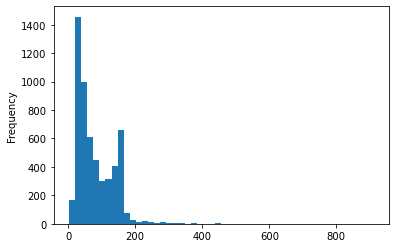

In [9]:
messages['length'].plot(bins=50, kind='hist') 

Có vẻ như độ dài văn bản có thể là một tính năng đáng để suy nghĩ! Hãy thử giải thích lý do tại sao trục x đi hết cỡ 1000, điều này có nghĩa là có một số tin nhắn email thực sự dài!

In [10]:
messages.length.describe()

count    5572.000000
mean       80.490309
std        59.944527
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Chà! 910 ký tự, hãy sử dụng masking để tìm tin nhắn email này: (không biết masking là gì thì google nhé)

In [11]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Có vẻ như chúng tôi có một số loại email tình cảm :D (kiểu như đoạn tin nhắn của 2 người yêu nhau :D ) gọi những email như thế này là Romeo ! Nhưng chúng ta hãy tập trung trở lại ý tưởng thử xem độ dài tin nhắn có phải là đặc điểm phân biệt giữa ham và spam hay không:

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

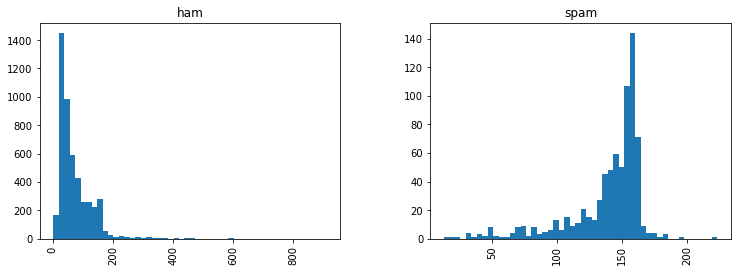

In [12]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

Rất thú vị! Chỉ thông qua EDA cơ bản, chúng tôi đã có thể phát hiện ra xu hướng mà các tin nhắn email rác có xu hướng có nhiều ký tự hơn. (Xin lỗi Romeo!)

Bây giờ chúng ta hãy bắt đầu xử lý dữ liệu để cuối cùng chúng ta có thể sử dụng nó với SciKit Learn!

## Text Pre-processing - Tiền xử lý văn bản

Vấn đề chính của chúng tôi với dữ liệu là tất cả đều ở định dạng văn bản (chuỗi). Các thuật toán phân loại mà chúng ta đã học cho đến nay sẽ cần một số loại vectơ đặc trưng số để thực hiện nhiệm vụ phân loại. Thực tế có nhiều phương pháp để chuyển đổi một kho ngữ liệu sang định dạng vectơ. Đơn giản nhất là phương pháp tiếp cận [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model), trong đó mỗi từ duy nhất trong văn bản sẽ được thể hiện bằng một số.


Trong phần này, chúng ta sẽ chuyển đổi các thông điệp thô (raw emails) (chuỗi ký tự) thành vectơ (gồm chuỗi các số).

Bước đầu tiên, hãy viết một hàm sẽ chia một tin nhắn thành các từ riêng lẻ của nó và trả về một list(danh sách). Chúng tôi cũng sẽ xóa các từ rất phổ biến, ('the', 'a', v.v.). Để làm điều này, chúng tôi sẽ tận dụng thư viện NLTK. Đây là thư viện tiêu chuẩn trong Python để xử lý văn bản và có rất nhiều tính năng hữu ích. Chúng tôi sẽ chỉ sử dụng một số cái cơ bản ở đây.

Hãy tạo một hàm xử lý chuỗi trong cột tin nhắn emails(message), sau đó chúng ta có thể chỉ sử dụng **apply()** trong pandas để xử lý tất cả văn bản trong DataFrame.

Lần đầu tiên loại bỏ dấu chấm câu. Chúng ta chỉ có thể tận dụng thư viện **string** tích hợp sẵn của Python để có được danh sách nhanh tất cả các dấu câu có thể có:

In [13]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Kiểm tra các ký tự để xem chúng có nằm trong kiểu dữ liệu dấu câu hay không
nopunc = [char for char in mess if char not in string.punctuation]

# Nối các ký tự lại để tạo thành chuỗi.
nopunc = ''.join(nopunc)

Bây giờ chúng ta hãy xem làm thế nào để loại bỏ các từ dừng (stopwords: những từ mà công cụ tìm kiếm thường bỏ qua, ví dụ như a, an, the, many,...). Chúng tôi có thể nhập danh sách các stopwords tiếng Anh từ NLTK (kiểm tra tài liệu để biết thêm ngôn ngữ và thông tin).

In [17]:
from nltk.corpus import stopwords
#Show some stop words
stopwords.words('english')[0:10] 
#đoạn này thử tiếng việt đéo ra :v

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [19]:
# Bây giờ chỉ cần xoá bất kỳ stopwords nào
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [20]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

Bây giờ chúng ta hãy đặt cả hai điều này lại với nhau trong một hàm để áp dụng nó vào DataFrame của chúng ta sau này:

In [21]:
def text_process(mess):
    """  
    Lấy một chuỗi văn bản, sau đó thực hiện như sau:
     1. Xóa tất cả các dấu câu
     2. Xóa tất cả các từ dừng (stopwords)
     3. Trả về danh sách văn bản đã được làm sạch
    """
    
    # Kiểm tra các ký tự để xem chúng có dấu câu hay không
    nopunc = [char for char in mess if char not in string.punctuation]

    # Nối các ký tự lại để tạo thành chuỗi.
    nopunc = ''.join(nopunc)
    
    # xoá các stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Đây là DataFrame ban đầu một lần nữa:

In [22]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Bây giờ chúng ta hãy "mã hóa(tokenize)" những tin nhắn này. Tokenization chỉ là thuật ngữ được sử dụng để mô tả quá trình chuyển đổi các chuỗi văn bản bình thường thành một danh sách các tokens (những từ mà chúng ta thực sự muốn).

Hãy xem một ví dụ đầu ra trên cột:

**Ghi chú:**
Chúng ta có thể nhận được một số cảnh báo hoặc lỗi đối với các ký hiệu mà chúng ta không tính đến hoặc không có trong Unicode (như ký hiệu bảng Anh)

In [23]:
# Kiểm tra để đảm bảo nó hoạt động
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [25]:
# Hiển thị dataframe gốc
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Continuing Normalization - Tiếp tục chuẩn hóa

Có rất nhiều cách để tiếp tục chuẩn hóa văn bản này. Chẳng hạn như [Stemming](https://en.wikipedia.org/wiki/Stemming) hoặc distinguishing (phân biệt) theo [part of speech](http://www.nltk.org/book/ch05.html)..

NLTK có rất nhiều công cụ tích hợp và tài liệu tuyệt vời về rất nhiều phương pháp này. Đôi khi chúng không hoạt động tốt cho tin nhắn văn bản do cách nhiều người có xu hướng sử dụng chữ viết tắt, Ví dụ:
    
     'Nah dawg, IDK! Wut time u headin to da club?'
    
với cả

     'No dog, I don't know! What time are you heading to the club?'
    
Một số phương pháp chuẩn hóa văn bản sẽ gặp sự cố với loại tốc ký này và vì vậy tôi sẽ để bạn khám phá các phương pháp nâng cao hơn đó thông qua [NLTK book online](http://www.nltk.org/book/).

Bây giờ chúng ta sẽ chỉ tập trung vào việc sử dụng những gì chúng ta có để chuyển đổi danh sách các từ của chúng ta thành một vectơ thực tế mà thư viện SciKit-Learn có thể sử dụng.

## Vectorization

Hiện tại, chúng tôi có các tin nhắn emails dưới dạng danh sách mã token (còn được gọi là bổ đề: [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) và bây giờ chúng tôi cần chuyển đổi từng tin nhắn emails đó thành vectơ mà các mô hình thuật toán của SciKit Learn có thể hoạt động.

Bây giờ chúng ta sẽ chuyển đổi từng thông báo, được biểu diễn dưới dạng danh sách các token (bổ đề) ở trên, thành một vectơ mà các mô hình học máy có thể hiểu được.

Chúng tôi sẽ thực hiện điều đó trong ba bước bằng cách sử dụng mô hình bag-of-words:

1. Đếm bao nhiêu lần một từ xuất hiện trong mỗi tin nhắn (cái này gọi là tần suất)

2. Cân số lượng để các token thường xuyên xuất hiện có trọng lượng thấp hơn (tần suất tài liệu nghịch đảo)

3. Chuẩn hóa các vectơ thành độ dài đơn vị, để trừu tượng hóa từ độ dài văn bản gốc (chỉ tiêu L2(L2 norm))

Hãy bắt đầu bước đầu tiên:

Mỗi vectơ sẽ có nhiều chiều như có các từ duy nhất trong kho dữ liệu SMS. Đầu tiên chúng tôi sẽ sử dụng **CountVectorizer** của SciKit Learn. Mô hình này sẽ chuyển đổi một bộ sưu tập các tài liệu văn bản thành một ma trận số lượng token.

Chúng ta có thể hình dung đây là một ma trận 2 chiều. Trong đó chiều 1 là toàn bộ từ vựng (1 hàng trên mỗi từ) và chiều còn lại là tài liệu thực tế, trong trường hợp này là một cột trên mỗi tin nhắn văn bản.

Ví dụ:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Vì có rất nhiều thư, chúng ta có thể mong đợi rất nhiều số 0 cho sự hiện diện của từ đó trong tài liệu đó. Do đó, SciKit Learn sẽ xuất ra (ma trận thưa thớt)[Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

Có rất nhiều đối số và tham số có thể được truyền cho CountVectorizer. Trong trường hợp này, chúng ta sẽ chỉ định **analyzer** là chức năng được xác định trước đó của riêng chúng ta:

In [27]:
# Có thể mất một lúc...
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# In tổng số từ vocab
print(len(bow_transformer.vocabulary_))

11425


Hãy lấy một thư và nhận số lượng từ ngữ của nó dưới dạng vectơ, sử dụng `bow_transformer` :

In [28]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


Bây giờ chúng ta hãy xem biểu diễn vector của nó:

In [29]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


Điều này có nghĩa là có bảy từ duy nhất trong tin nhắn số 4 (sau khi loại bỏ các từ stopwords thông thường). Hai trong số chúng xuất hiện hai lần, số còn lại chỉ xuất hiện một lần. Hãy tiếp tục và kiểm tra và xác nhận những cái nào xuất hiện hai lần:

In [31]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


Bây giờ chúng ta có thể sử dụng **.transform** trên đối tượng được biến đổi Bag-of-Words (bow-cây cung) của chúng ta và biến đổi toàn bộ DataFrame của thư. Hãy tiếp tục và kiểm tra cách tính số lượng từ cho toàn bộ kho tin nhắn SMS là một ma trận lớn, thưa thớt:

In [32]:
messages_bow = bow_transformer.transform(messages['message'])

In [33]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [34]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


Sau khi đếm, thuật ngữ trọng số và chuẩn hóa có thể được thực hiện với [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), sử dụng `TfidfTransformer` của scikit-learning.

____
### Vậy thì TF-IDF là gì ?


TF-IDF là viết tắt của *term frequency-inverse document frequency(thuật ngữ tần số tài liệu nghịch đảo tần số)*, và trọng số tf-idf là trọng số thường được sử dụng trong truy xuất thông tin và khai thác văn bản. Trọng số này là một thước đo thống kê được sử dụng để đánh giá mức độ quan trọng của một từ đối với một tài liệu trong một bộ sưu tập hoặc kho ngữ liệu. Mức độ quan trọng tăng tỷ lệ thuận với số lần một từ xuất hiện trong tài liệu nhưng được bù đắp bởi tần suất xuất hiện của từ đó trong kho ngữ liệu. Các biến thể của lược đồ trọng số tf-idf thường được các công cụ tìm kiếm sử dụng như một công cụ trung tâm để chấm điểm và xếp hạng mức độ liên quan của tài liệu khi đưa ra một truy vấn của người dùng.

Một trong những hàm xếp hạng đơn giản nhất được tính bằng cách tính tổng tf-idf cho mỗi cụm từ truy vấn; nhiều chức năng xếp hạng phức tạp hơn là các dạng khác của mô hình đơn giản này.

Thông thường, trọng số tf-idf được bao gồm bởi hai thuật ngữ: thuật ngữ thứ nhất tính Tần suất kỳ hạn(Term Frequency) chuẩn hóa (TF), hay còn gọi là. số lần một từ xuất hiện trong tài liệu, chia cho tổng số từ trong tài liệu đó; thuật ngữ thứ hai là Tần suất tài liệu nghịch đảo (IDF), được tính bằng logarit của số tài liệu trong kho tài liệu chia cho số tài liệu nơi thuật ngữ cụ thể xuất hiện.


**TF: Tần suất thuật ngữ**, đo tần suất một thuật ngữ xuất hiện trong tài liệu. Vì mỗi tài liệu có độ dài khác nhau, nên có thể một thuật ngữ sẽ xuất hiện nhiều lần trong các tài liệu dài hơn so với các thuật ngữ ngắn hơn. Do đó, tần suất thuật ngữ thường được chia cho độ dài tài liệu (hay còn gọi là tổng số thuật ngữ trong tài liệu) như một cách chuẩn hóa:

*TF(t) = (Số lần thuật ngữ t xuất hiện trong tài liệu) / (Tổng số thuật ngữ trong tài liệu).*

**IDF: Tần suất tài liệu nghịch đảo**, đo lường mức độ quan trọng của một thuật ngữ. Trong khi tính toán TF, tất cả các thuật ngữ đều được coi là quan trọng như nhau. Tuy nhiên, người ta biết rằng một số thuật ngữ nhất định, chẳng hạn như "is", "of", và "that", có thể xuất hiện nhiều lần nhưng ít quan trọng. Vì vậy, chúng ta cần phải (weight down) cân nhắc các thuật ngữ thường xuyên trong khi mở rộng quy mô các thuật ngữ hiếm, bằng cách tính toán như sau:

*IDF(t) = log_e (Tổng số tài liệu / Số tài liệu có thuật ngữ t trong đó).*

Xem bên dưới để biết một ví dụ đơn giản.

**Ví dụ:**

Hãy xem xét một tài liệu có 100 từ, trong đó từ cat xuất hiện 3 lần.

Tần số thuật ngữ (tức là tf) đối với cat khi đó là (3/100) = 0,03. Bây giờ, giả sử chúng ta có 10 triệu tài liệu và từ cat xuất hiện trong một nghìn tài liệu trong số này. Sau đó, tần suất tài liệu nghịch đảo (tức là idf) được tính là log (10.000.000 / 1.000) = 4. Do đó, trọng số Tf-idf là tích của các đại lượng này: 0,03 * 4 = 0,12.
____

Hãy tiếp tục và xem cách chúng ta có thể làm điều này trong SciKit Learn:



In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


Chúng ta sẽ tiếp tục và kiểm tra IDF (tần suất tài liệu nghịch đảo) của từ `"u"` và của từ `"university"` là gì?

In [36]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


Để chuyển đổi toàn bộ kho từ (bag-of-words) thành ngữ liệu TF-IDF cùng một lúc:

In [37]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


Có nhiều cách dữ liệu có thể được tiền xử lý và vector hóa. Các bước này liên quan đến kỹ thuật feature và xây dựng một "đường ống" ("pipeline"). Tôi khuyến khích bạn xem tài liệu của SciKit Learn về cách xử lý dữ liệu văn bản cũng như bộ sưu tập mở rộng các nghiên cứu và sách có sẵn về chủ đề chung của NLP.

## Training a model

Với các thư được biểu diễn dưới dạng vectơ, cuối cùng chúng ta cũng có thể training trình phân loại thư spam/ham của mình. Bây giờ chúng ta thực sự có thể sử dụng hầu hết mọi loại thuật toán phân loại. Vì [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), thuật toán phân loại Naive Bayes là một lựa chọn tốt .

Chúng tôi sẽ sử dụng scikit-learning ở đây, chọn trình phân loại [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) để bắt đầu:

In [38]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Hãy thử phân loại thông điệp ngẫu nhiên duy nhất của chúng ta và xem chúng ta thực hiện như thế nào:

In [39]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


Tuyệt vời! Chúng ta đã phát triển một mô hình có thể cố gắng dự đoán phân loại spam vs ham!

## Part 6: Model Evaluation - Đánh giá mô hình

Bây giờ chúng tôi muốn xác định xem mô hình của chúng tôi sẽ hoạt động tốt như thế nào trên toàn bộ tập dữ liệu. Hãy bắt đầu bằng cách nhận tất cả các dự đoán:

In [40]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


Chúng tôi có thể sử dụng báo cáo phân loại tích hợp sẵn của SciKit Learn, báo cáo này trả về [precision, recall,](https://en.wikipedia.org/wiki/Precision_and_recall) [f1-score](https://en.wikipedia.org/wiki/F1_score) và cột hỗ trợ (nghĩa là có bao nhiêu trường hợp đã hỗ trợ phân loại đó). Kiểm tra các liên kết để biết thêm thông tin chi tiết về từng chỉ số này và hình bên dưới:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [41]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



Có khá nhiều số liệu khả thi để đánh giá hiệu suất của mô hình. Cái nào là quan trọng nhất phụ thuộc vào nhiệm vụ và hiệu quả kinh doanh của các quyết định dựa trên mô hình. Ví dụ, chi phí dự đoán sai "spam" là "ham" có lẽ thấp hơn nhiều so với dự đoán sai "ham" là "spam".

Trong "đánh giá" ở trên, chúng ta đã đánh giá độ chính xác trên cùng dữ liệu mà chúng ta đã sử dụng để đào tạo. **Bạn thực sự không bao giờ nên đánh giá trên cùng một tập dữ liệu mà bạn đào tạo!**

Việc đánh giá như vậy không cho chúng ta biết gì về khả năng dự đoán thực sự của mô hình của chúng ta. Nếu chúng tôi chỉ nhớ từng ví dụ trong quá trình đào tạo, thì độ chính xác của dữ liệu đào tạo sẽ là 100%, mặc dù chúng tôi sẽ không thể phân loại bất kỳ thông báo mới nào.

Một cách thích hợp là chia dữ liệu thành tập huấn luyện / thử nghiệm, trong đó mô hình chỉ nhìn thấy **dữ liệu huấn luyện** trong quá trình điều chỉnh tham số và điều chỉnh mô hình. **Dữ liệu thử nghiệm** không bao giờ được sử dụng theo bất kỳ trường hợp. Sau đó, đây là đánh giá cuối cùng của chúng tôi về dữ liệu thử nghiệm là đại diện cho hiệu suất dự đoán thực sự.

## Train Test Split - Tách thử nghiệm

In [42]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


Kích thước thử nghiệm là 20% của toàn bộ tập dữ liệu (1115 thư trên tổng số 5572) và phần còn lại là huấn luyện (4457 trên 5572). Lưu ý rằng mức phân chia mặc định sẽ là 30/70.

## Creating a Data Pipeline - Tạo đường ống dữ liệu


Hãy chạy lại mô hình của chúng ta và sau đó dự đoán ra khỏi tập thử nghiệm. Chúng tôi sẽ sử dụng các khả năng [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) của SciKit Learn để lưu trữ quy trình làm việc. Điều này sẽ cho phép chúng tôi thiết lập tất cả các chuyển đổi mà chúng tôi sẽ thực hiện đối với dữ liệu để sử dụng trong tương lai. Hãy xem một ví dụ về cách nó hoạt động:

In [43]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts(chuỗi để đếm số nguyên token) 
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores(số nguyên cho điểm TF-IDF có trọng số)
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier(đào tạo trên vectơ TF-IDF với bộ phân loại Naive Bayes)
])

Giờ đây, chúng tôi có thể chuyển trực tiếp dữ liệu văn bản tin nhắn và hệ thống sẽ thực hiện quá trình xử lý trước cho chúng tôi! Chúng tôi có thể coi nó như một model/estimator API :

In [44]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001E3BCF7A3A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [45]:
predictions = pipeline.predict(msg_test)

In [46]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1010
        spam       0.71      1.00      0.83       105

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



Bây giờ chúng ta có một báo cáo phân loại cho mô hình của chúng tôi trên một tập hợp thử nghiệm thực sự! Còn rất nhiều thứ khác về Xử lý ngôn ngữ tự nhiên so với những gì chúng tôi đã đề cập ở đây và chủ đề rộng lớn của nó có thể lấp đầy một số khóa học đại học! Tôi khuyến khích bạn xem các tài nguyên bên dưới để biết thêm thông tin về NLP!

## More Resources

Xem các liên kết bên dưới để biết thêm thông tin về Xử lý ngôn ngữ tự nhiên:

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

# Good Job!